In [1]:
import anndata
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define plot parameters
sns.set_palette("viridis")
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
path = '/home/katerchen/Code/data/'

kang_norm = anndata.read_h5ad(path + 'kang_normalized_hvg.h5ad')
Norman_prep = anndata.read_h5ad(path + 'Norman2019_prep_new.h5ad')
combo_sciplex = anndata.read_h5ad(path + 'combo_sciplex_prep_hvg_filtered.h5ad')
GSM_new = anndata.read_h5ad(path + 'GSM_new.h5ad')

Exploratory Data Analysis

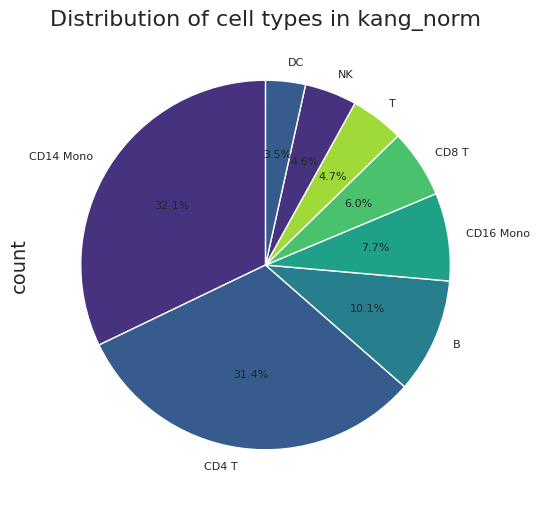

In [3]:
# plot the number of cells in each cell type for each dataset as a circle plot
# kang_norm
kang_norm.obs['cell_type'].value_counts().plot(kind='pie', title='kang_norm', autopct='%1.1f%%', startangle=90, fontsize=8)
# kang_norm.obs['cell_type'].value_counts().plot(kind='bar', title='kang_norm', color='red', edgecolor='black', linewidth=1.2)
plt.title('Distribution of cell types in kang_norm')
plt.show()

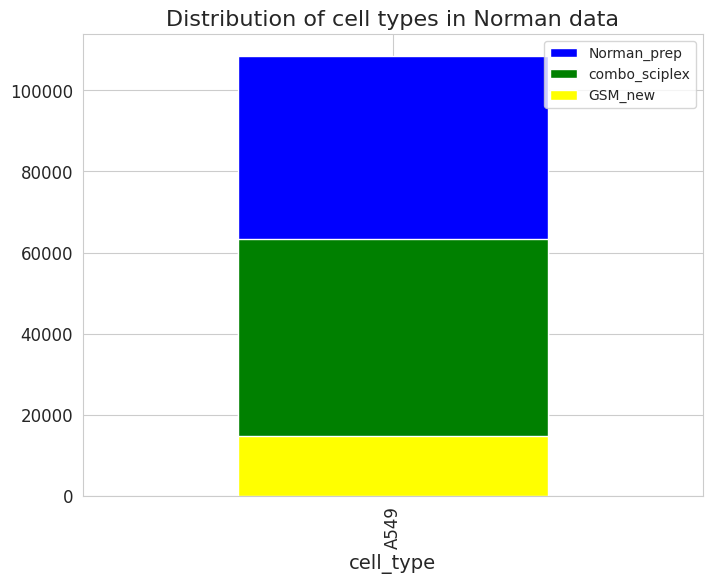

In [4]:
# Norman_prep
Norman_prep.obs['cell_type'].value_counts().plot(kind='bar', title='Norman_prep', color='blue')

# combo_sciplex
combo_sciplex.obs['cell_type'].value_counts().plot(kind='bar', title='combo_sciplex', color='green')

# GSM_new
GSM_new.obs['cell_type'].value_counts().plot(kind='bar', title='GSM_new', color='yellow')

plt.title('Distribution of cell types in Norman data')
plt.legend(['Norman_prep', 'combo_sciplex', 'GSM_new'])
plt.show()

In [5]:
# get the amount of cells in each dataset
print("Kang-Norm-Cells: ", kang_norm.shape[0])
print("Norman-Cells: ", Norman_prep.shape[0])
print("Combo-Cells: ", combo_sciplex.shape[0])
print("GSM-Cells: ", GSM_new.shape[0])

# get the amount of genes in each dataset
print("Kang-Norm-Genes: ", kang_norm.shape[1])
print("Norman-Genes: ", Norman_prep.shape[1])
print("Combo-Genes: ", combo_sciplex.shape[1])
print("GSM-Genes: ", GSM_new.shape[1])

Kang-Norm-Cells:  13576
Norman-Cells:  108497
Combo-Cells:  63378
GSM-Cells:  14811
Kang-Norm-Genes:  5000
Norman-Genes:  5000
Combo-Genes:  5000
GSM-Genes:  4999


In [6]:
sc.pp.pca(kang_norm)
sc.pp.neighbors(kang_norm)
# sc.tl.leiden(kang_norm)
sc.tl.umap(kang_norm)
# sc.pl.umap(kang_norm, color=['leiden'])

/home/katerchen/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


: 

In [ ]:
# umap plot of norman
sc.pp.pca(Norman_prep)
sc.pp.neighbors(Norman_prep)
sc.tl.umap(Norman_prep)


/home/katerchen/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
# umap plot of combo
sc.pp.pca(combo_sciplex)
sc.pp.neighbors(combo_sciplex)
sc.tl.umap(combo_sciplex)

/home/katerchen/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
# umap plot of combo
sc.pp.pca(GSM_new)
sc.pp.neighbors(GSM_new)
sc.tl.umap(GSM_new)

/home/katerchen/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


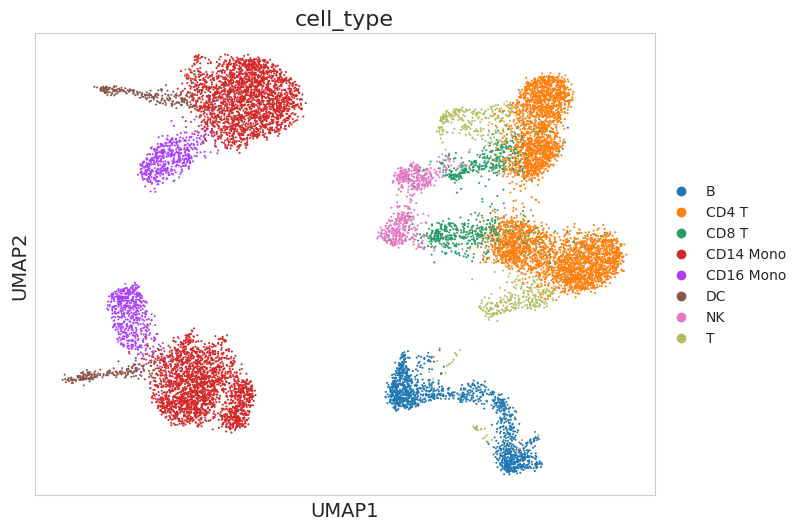

In [ ]:
sc.pl.umap(kang_norm, color=['cell_type'])

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


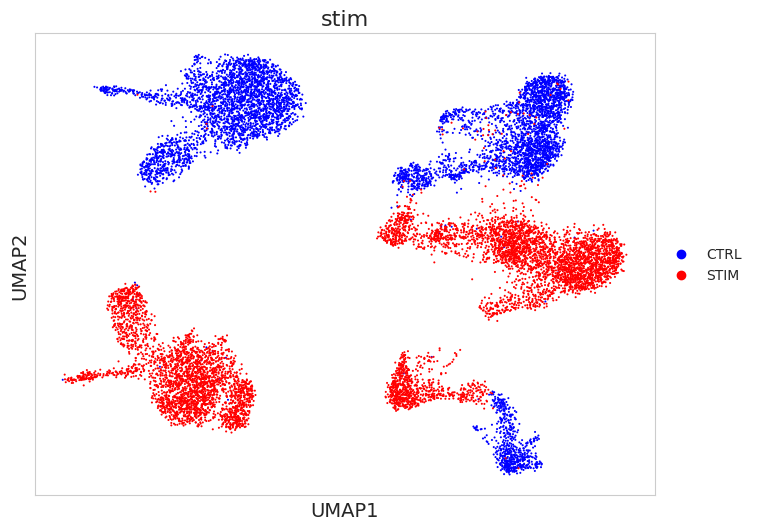

In [ ]:
# differentiate in umap between ctrl and stim cells
import matplotlib.colors as mcolors
# Define custom colormap
sns.set_palette(['blue', 'red'])

sc.pl.umap(kang_norm, color=['stim'])
plt.show()

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


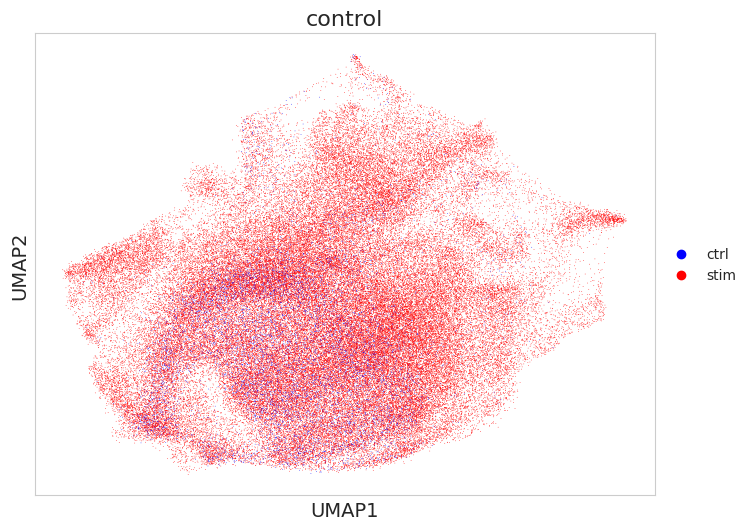

In [ ]:
# replace the values in Norman_prep.obs['control'] with 0 and 1 with ctrl and stim
Norman_prep.obs['control'] = Norman_prep.obs['control'].replace(0, 'stim')
Norman_prep.obs['control'] = Norman_prep.obs['control'].replace(1, 'ctrl')

# plot the umap of Norman_prep with the control and stim cells colored
sc.pl.umap(Norman_prep, color=['control'])
plt.show()

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


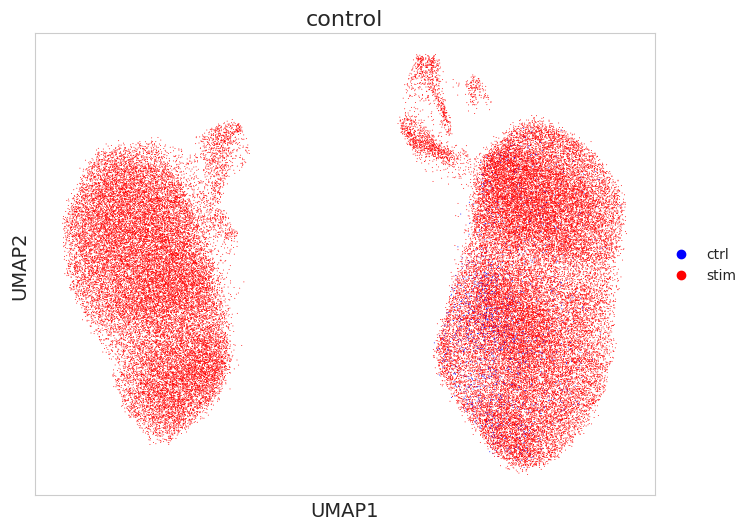

In [ ]:
# replace the values in combo_sciplex.obs['control'] with 0 and 1 with ctrl and stim
combo_sciplex.obs['control'] = combo_sciplex.obs['control'].replace(0, 'stim')
combo_sciplex.obs['control'] = combo_sciplex.obs['control'].replace(1, 'ctrl')

# plot the umap of combo_sciplex with the control and stim cells colored
sc.pl.umap(combo_sciplex, color=['control'])
plt.show()

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


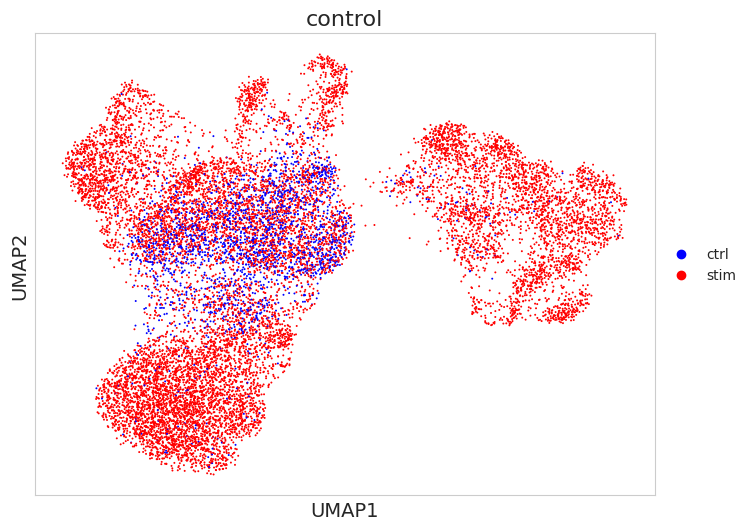

In [ ]:
# replace the values in GSM_new.obs['control'] with 0 and 1 with ctrl and stim
GSM_new.obs['control'] = GSM_new.obs['control'].replace(0, 'stim')
GSM_new.obs['control'] = GSM_new.obs['control'].replace(1, 'ctrl')

# plot the umap of GSM_new with the control and stim cells colored
sc.pl.umap(GSM_new, color=['control'])
plt.show()

In [ ]:
# calculate means of each gene divided by 'stim' and 'ctrl' cells
# kang_norm
kang_norm_stim = kang_norm[kang_norm.obs['stim'] == 'STIM']
kang_norm_ctrl = kang_norm[kang_norm.obs['stim'] == 'CTRL']
kang_norm_stim_mean = kang_norm_stim.X.mean(axis=0)
kang_norm_ctrl_mean = kang_norm_ctrl.X.mean(axis=0)

# calculate log2 fold change
kang_norm_log2fc = np.log2(kang_norm_stim_mean / kang_norm_ctrl_mean)

/home/katerchen/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_13102/836194882.py:9: RuntimeWarning: divide by zero encountered in divide
  kang_norm_log2fc = np.log2(kang_norm_stim_mean / kang_norm_ctrl_mean)
/tmp/ipykernel_13102/836194882.py:9: RuntimeWarning: divide by zero encountered in log2
  kang_norm_log2fc = np.log2(kang_norm_stim_mean / kang_norm_ctrl_mean)


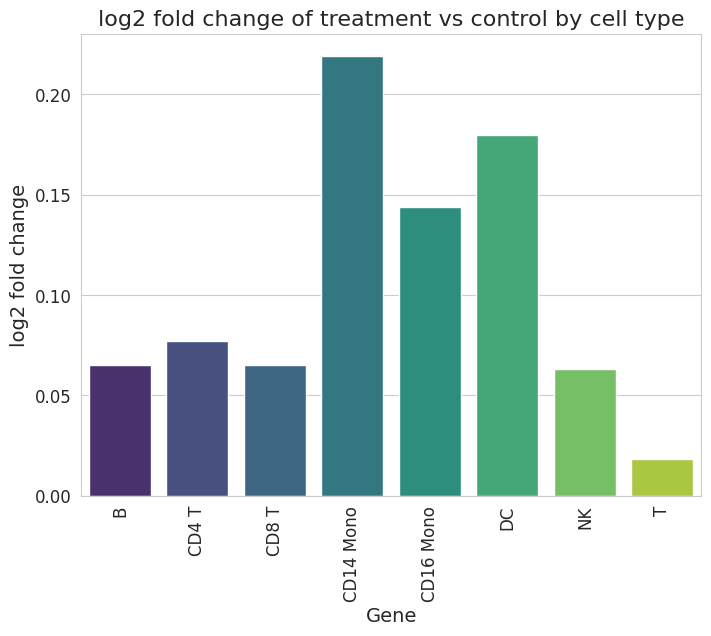

In [ ]:
# log2 fold change of treatment vs control by cell type
cell_types = kang_norm.obs['cell_type'].unique()

log2fc_by_cell_type = []

for cell_type in cell_types:
    # Filter the data for the current cell type
    kang_norm_cell_type = kang_norm[kang_norm.obs['cell_type'] == cell_type]
    # Calculate means of each gene divided by 'stim' and 'ctrl' cells for the current cell type
    kang_norm_stim = kang_norm_cell_type[kang_norm_cell_type.obs['stim'] == 'STIM']
    kang_norm_ctrl = kang_norm_cell_type[kang_norm_cell_type.obs['stim'] == 'CTRL']
    kang_norm_stim_mean = kang_norm_stim.X.mean(axis=0)
    kang_norm_ctrl_mean = kang_norm_ctrl.X.mean(axis=0)

    # Calculate log2 fold change for the current cell type
    kang_norm_log2fc = np.log2(kang_norm_stim_mean.mean(axis=0) / kang_norm_ctrl_mean.mean(axis=0))
    # Append the log2 fold change values to the list
    log2fc_by_cell_type.append(kang_norm_log2fc)

# Create a DataFrame to store the results
log2fc_df = pd.DataFrame(log2fc_by_cell_type, index=cell_types)

# Transpose the DataFrame for plotting
log2fc_df = log2fc_df.T

# Visualize log2 fold changes by cell type
sns.barplot(data=log2fc_df, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Gene")
plt.ylabel("log2 fold change")
plt.title("log2 fold change of treatment vs control by cell type")
plt.show()


In [ ]:
log2fc_df

,CD14 Mono,CD4 T,T,CD8 T,B,DC,CD16 Mono,NK
0,0.219208,0.076912,0.018603,0.065372,0.065393,0.179546,0.143787,0.06329


In [ ]:
# quality control metrics of the datasets
sc.pp.calculate_qc_metrics(kang_norm, inplace=True)
sc.pp.calculate_qc_metrics(Norman_prep, inplace=True)
sc.pp.calculate_qc_metrics(combo_sciplex, inplace=True)
sc.pp.calculate_qc_metrics(GSM_new, inplace=True)

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


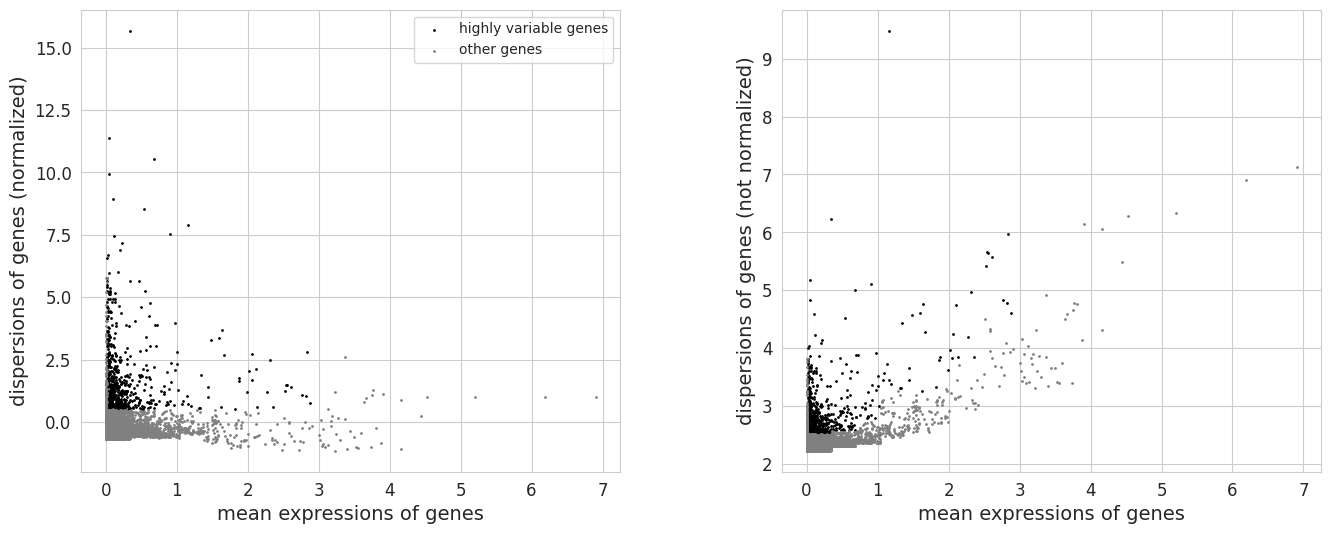

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


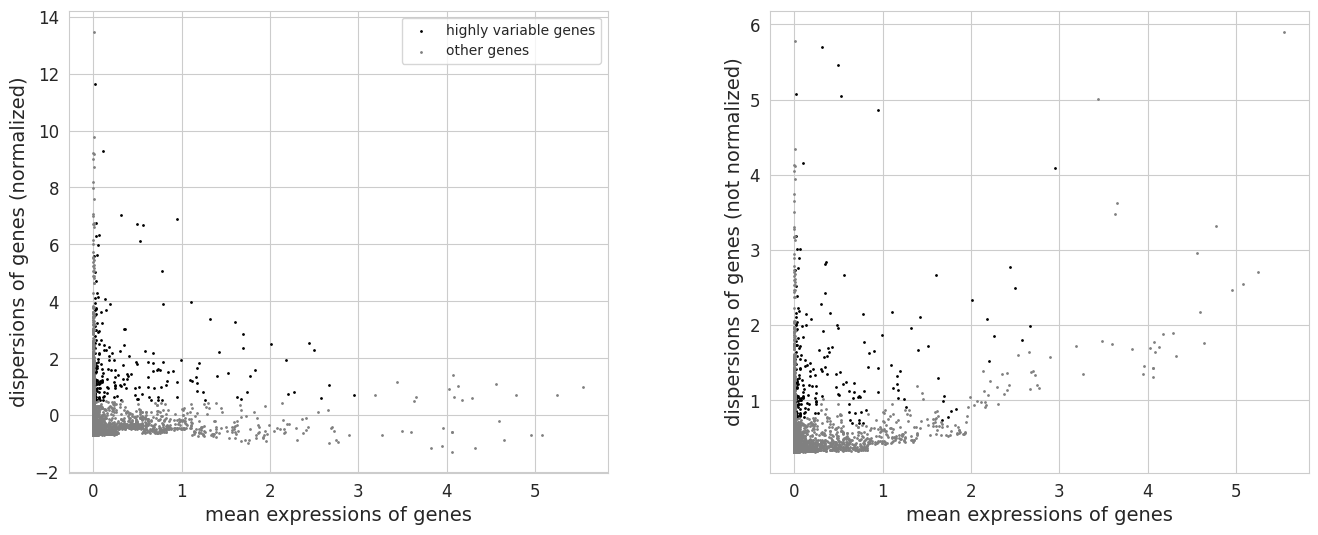

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


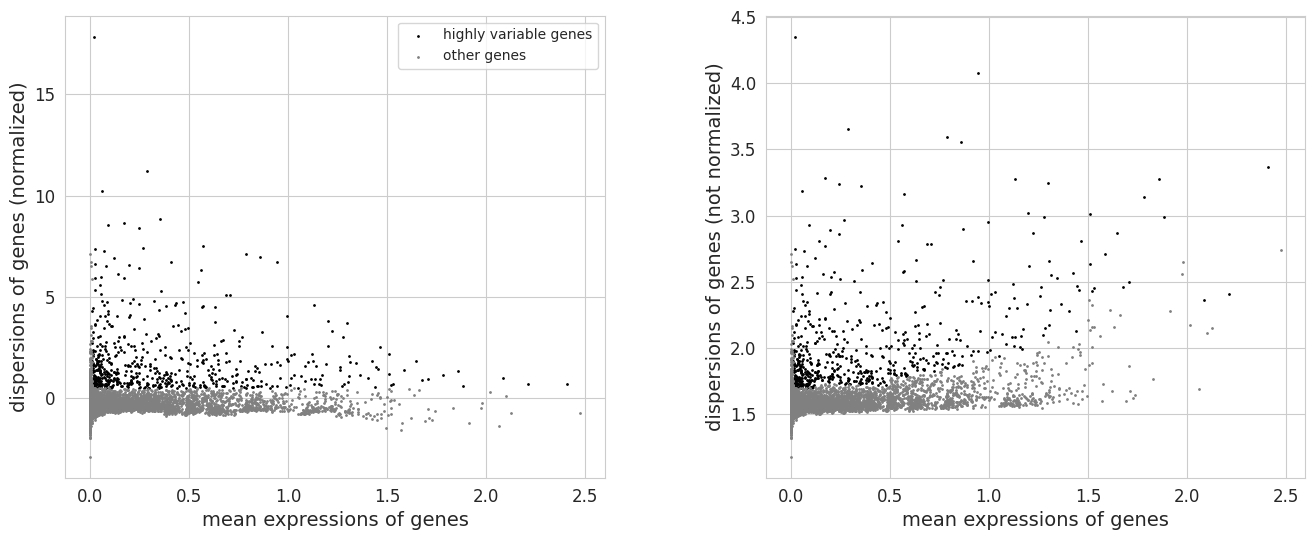

/home/katerchen/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


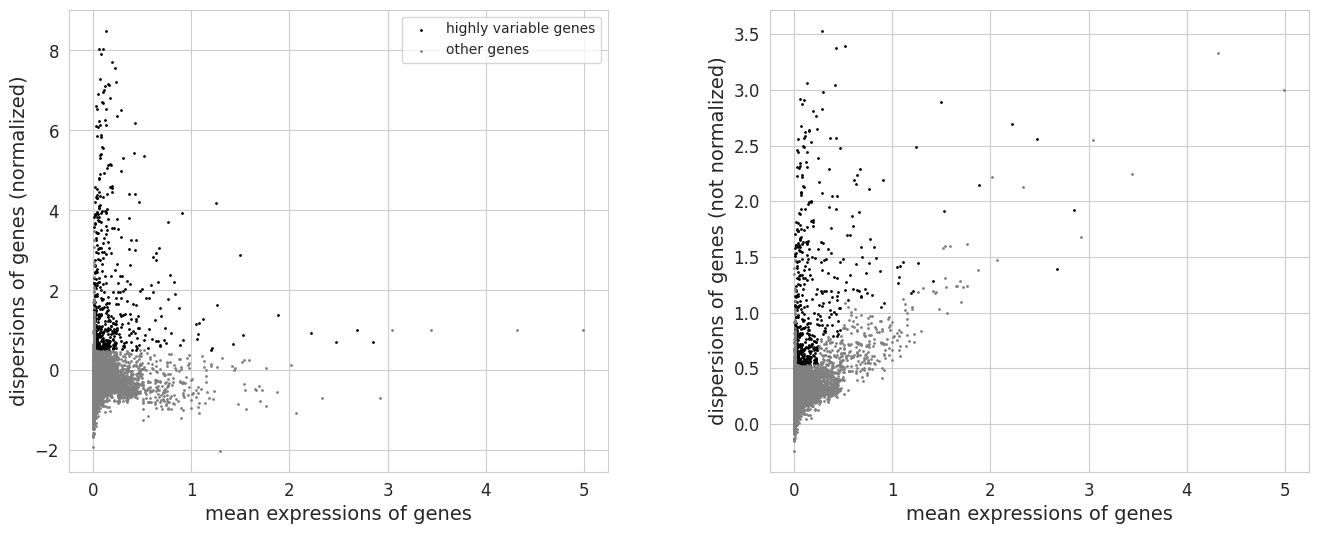

In [ ]:
# variance of the datasets - scatter plot
# kang_norm
sc.pp.highly_variable_genes(kang_norm, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(kang_norm)

# Norman_prep
sc.pp.highly_variable_genes(Norman_prep, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(Norman_prep)

# combo_sciplex
sc.pp.highly_variable_genes(combo_sciplex, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(combo_sciplex)

# GSM_new
sc.pp.highly_variable_genes(GSM_new, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(GSM_new)

In [ ]:
# calculate pct_counts_mt
mito_genes = [name for name in kang_norm.var_names if name.startswith('MT-')]
kang_norm.obs['pct_counts_mt'] = np.sum(kang_norm.X[:, [kang_norm.var_names.get_loc(gene) for gene in mito_genes]], axis=1) / np.sum(kang_norm.X, axis=1)

mito_genes = [name for name in Norman_prep.var_names if name.startswith('MT-')]
Norman_prep.obs['pct_counts_mt'] = np.sum(Norman_prep.X[:, [Norman_prep.var_names.get_loc(gene) for gene in mito_genes]], axis=1) / np.sum(Norman_prep.X, axis=1)

mito_genes = [name for name in combo_sciplex.var_names if name.startswith('MT-')]
combo_sciplex.obs['pct_counts_mt'] = np.sum(combo_sciplex.X[:, [combo_sciplex.var_names.get_loc(gene) for gene in mito_genes]], axis=1) / np.sum(combo_sciplex.X, axis=1)

mito_genes = [name for name in GSM_new.var_names if name.startswith('MT-')]
GSM_new.obs['pct_counts_mt'] = np.sum(GSM_new.X[:, [GSM_new.var_names.get_loc(gene) for gene in mito_genes]], axis=1) / np.sum(GSM_new.X, axis=1)


/home/katerchen/.local/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:795: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  g = sns.catplot(


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

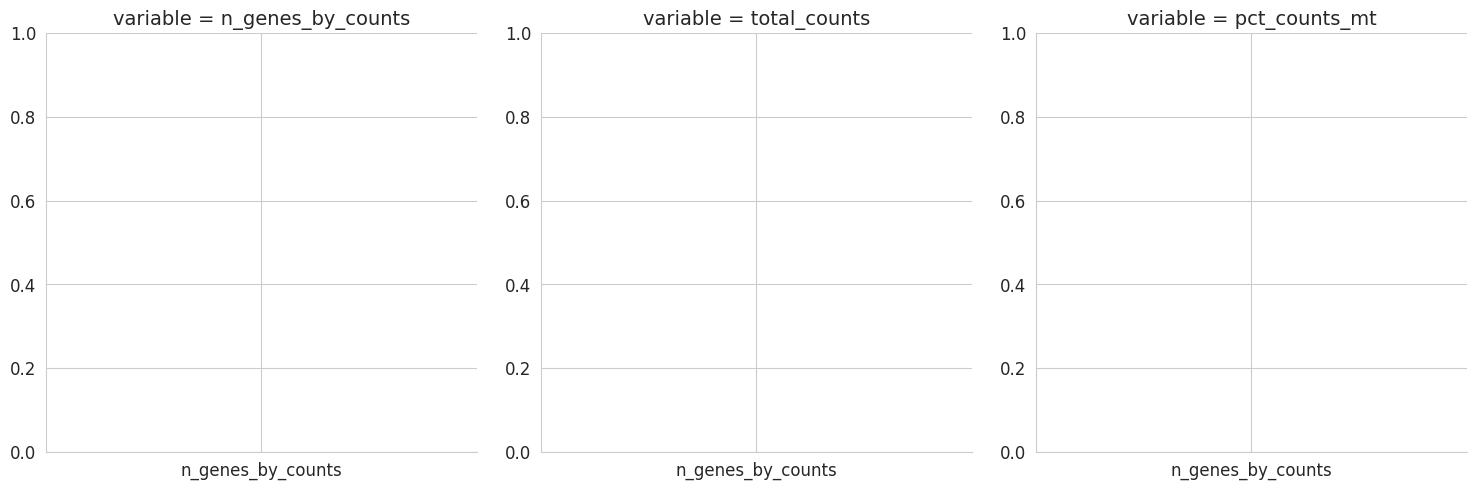

In [ ]:
# violin plots of the datasets
# kang_norm
sc.pl.violin(kang_norm, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# plt.title('Violin plots of kang_norm')

# Norman_prep
sc.pl.violin(Norman_prep, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# plt.title('Violin plots of Norman_prep')

# combo_sciplex
sc.pl.violin(combo_sciplex, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# plt.title('Violin plots of combo_sciplex')

# GSM_new
sc.pl.violin(GSM_new, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
# plt.title('Violin plots of GSM_new')

/home/katerchen/miniconda3/envs/wsl_deep/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/home/katerchen/miniconda3/envs/wsl_deep/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/katerchen/miniconda3/envs/wsl_deep/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/katerchen/miniconda3/envs/wsl_deep/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

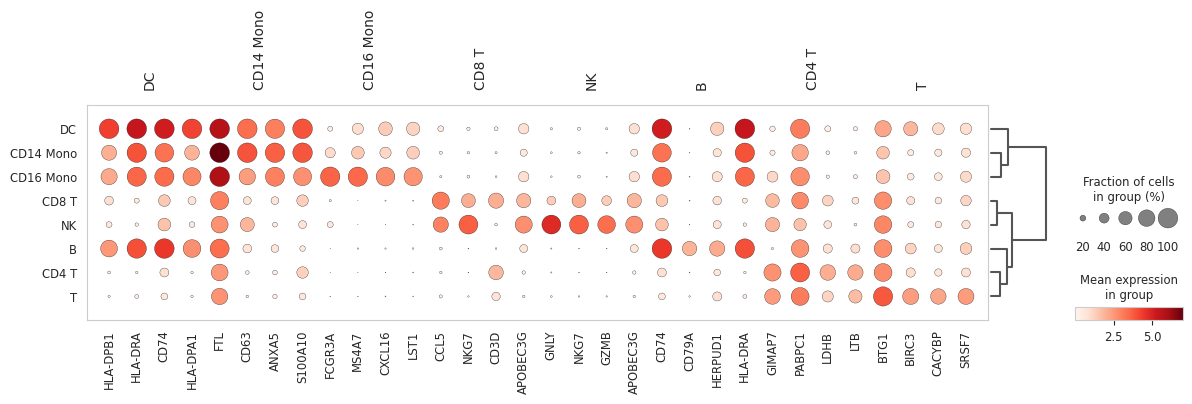

In [ ]:
# differential gene expression analysis of kang_norm
sc.tl.rank_genes_groups(kang_norm, 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(kang_norm, n_genes=4, groupby='cell_type')

In [ ]:
# calculate mean expression of each gene across all cells in Norman_prep, combo_sciplex and GSM_new

# Norman_prep
mean_expression_Norman_prep = np.mean(Norman_prep.X, axis=0)
# combo_sciplex
mean_expression_combo_sciplex = np.mean(combo_sciplex.X, axis=0)
# GSM_new
mean_expression_GSM_new = np.mean(GSM_new.X, axis=0)




In [ ]:
# plot the mean expression of each gene across all cells in Norman_prep, combo_sciplex and GSM_new
plt.hist(mean_expression_Norman_prep, bins=100, color='blue', edgecolor='black', linewidth=1.2)
plt.hist(mean_expression_combo_sciplex, bins=100, color='green', edgecolor='black', linewidth=1.2)
plt.hist(mean_expression_GSM_new, bins=100, color='yellow', edgecolor='black', linewidth=1.2)
plt.show()